In [24]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa, essentia, IPython.display

In [26]:
x = essentia.standard.MonoLoader('125_bounce.wav')()
fs = 44100
print x.shape
IPython.display.Audio(x, rate=fs)

TypeError: __init__() takes exactly 1 argument (2 given)

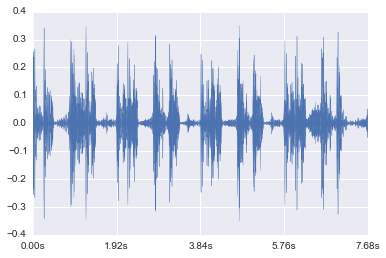

In [16]:
librosa.display.waveplot(x, fs)

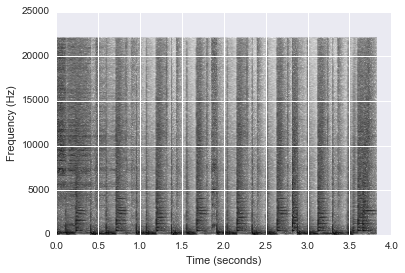

In [12]:
S, freqs, bins, im = plt.specgram(x, NFFT=1024, noverlap=512, Fs=44100)
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

In [17]:
onsets = librosa.onset.onset_detect(x, fs)
print onsets

[ 12  22  37  43  53  63  74  79  84  94 104 120 126 135 146 157 162 167
 177 187 203 208 218 228 244 260 270 285 291 301 307 311 317]


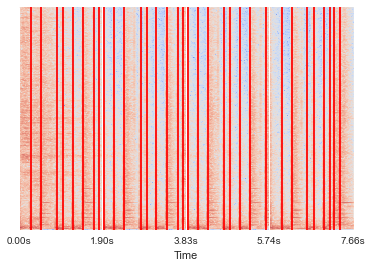

In [18]:
S = librosa.stft(x)
logS = librosa.logamplitude(S)
librosa.display.specshow(logS, fs, alpha=0.75, x_axis='time')
plt.vlines(onsets, 0, logS.shape[0], color='r')

In [22]:
# Use this, is probably the best
find_onsets = essentia.standard.OnsetRate()
onset_times, onset_rate = find_onsets(x)
print onset_times
print onset_rate

[ 0.01160998  0.23219955  0.59210885  0.70820862  0.94040817  1.06811786
  1.18421769  1.38158727  1.55573702  1.67183673  1.8575964   2.03174615
  2.14784575  2.34521532  2.50775504  2.62385488  2.80961442  2.9953742
  3.11147404  3.29723358  3.47138333  3.58748293]
5.72916698456


In [21]:
onsets_marker = essentia.standard.AudioOnsetsMarker(onsets=onset_times, type='beep')
x_beeps = onsets_marker(x)
IPython.display.Audio(x_beeps, rate=fs)

In [ ]:
def Reverse():
    """ Reverses a segment of audio."""
    pass